## 1. Introduction
Diabetes is a chronic condition that affects millions of people worldwide and, if not managed properly, can lead to serious health complications. Early detection is essential for preventing these complications and improving the quality of life for those at risk.

What if we could group or cluster individuals based on certain features to predict whether they are diabetic or not? In this project, I am working with patient data and using clustering techniques to categorize the data into two groups: predicted diabetic and predicted non-diabetic.

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of diferrent categories of data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data

### *  Download data from Kaggle

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)

In [13]:
import pandas as pd
diabetic_df = pd.read_csv(path +'/diabetes.csv')
diabetic_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### * Perform EDA on the houston housing price data
* check for any nuls missing values
* Clean the data

In [15]:
# check the shape of the data and number of records
# Also check the datatypes
diabetic_df.shape
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#All are numeric data type , now it is time to check for missing data null values 
diabetic_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# no nulls but the head shows zeroes , now cout zeroes in each column if not valid will take action to cleanup
for column in diabetic_df.columns:
    print(f" count of zeros in {column}:{ (diabetic_df[column] == 0).sum()}")

 count of zeros in Pregnancies:111
 count of zeros in Glucose:5
 count of zeros in BloodPressure:35
 count of zeros in SkinThickness:227
 count of zeros in Insulin:374
 count of zeros in BMI:11
 count of zeros in DiabetesPedigreeFunction:0
 count of zeros in Age:0
 count of zeros in Outcome:500


In [22]:
# plan to handle this records with zero values
# 1) Pregnancies can be zero , out come is existing label so it can be zero or 1
# 2) Glucose , only 5 records so we can drop them
#3) BloodPressure,SkinThickness,Insulin,BMI will fill with mod and last one with mean
for column_name in ('BloodPressure','SkinThickness','Insulin'):
    # Calculate the mean of the column, ignoring zeroes
    mode_value = diabetic_df.loc[diabetic_df[column_name] != 0, column_name].mode()[0]
    diabetic_df[column_name] = diabetic_df[column_name].replace(0, mode_value)
column_name='BMI'
mean_value = diabetic_df.loc[diabetic_df[column_name] != 0, column_name].mean()
diabetic_df[column_name] = diabetic_df[column_name].replace(0, mean_value)

In [23]:
diabetic_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,105,33.6,0.627,50,1
1,1,85,66,29,105,26.6,0.351,31,0
2,8,183,64,32,105,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3 Dimensionality reduction
  The dataset features are small, but for clustering it is good idea to standardize the data and perform a dimensionality reduction. Here I will be ploting the components after reducting dimensions and validate the cluster.

In [29]:
from sklearn.preprocessing import StandardScaler
# Define the features and the outcome
X = diabetic_df.iloc[:, :8]
y = diabetic_df.iloc[:, 8]

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### * Below is the plan for it 
* Will try pca first and see how the clustering information is preserved 
* Next will move towards the more optimized UMAP technique

In [38]:
from sklearn.decomposition import PCA
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)
print(pca_components)

[[-20.95342566  32.89417865]
 [-31.52920126 -31.97076718]
 [-15.76112158  63.04149164]
 ...
 [-18.88518974   2.10538401]
 [-24.69289954   9.3639712 ]
 [-30.22527745 -24.48950454]]


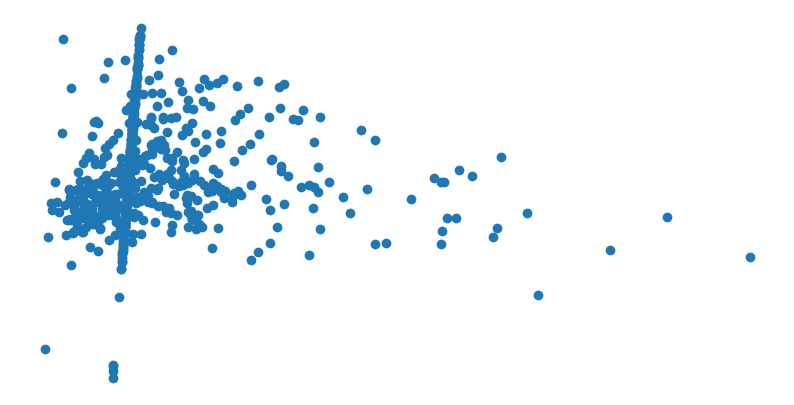

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [40]:
import umap

In [41]:
import time
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 2.6074743270874023 seconds


In [43]:
def plot(umap_results):
 plt.figure(figsize=(10,5))
 colours = ["r","b","g"]
 for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y.iloc[i]),
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()
plot(umap_results)

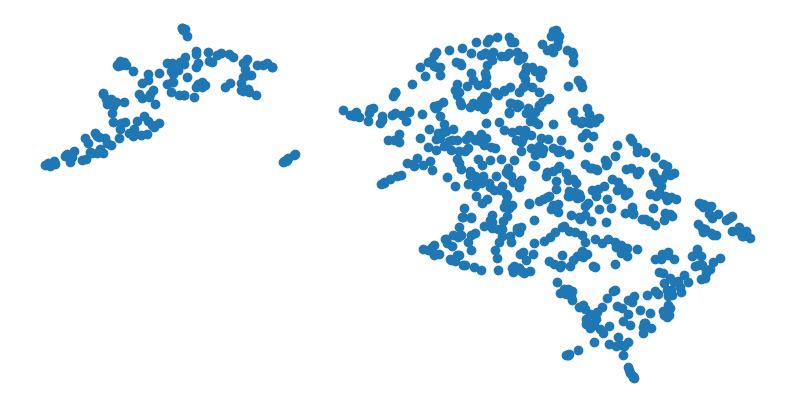

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

##### From above dimensionality reduction UMAP is better in preserving the clustering information compared to Pca , so I select the components from umap to run the clustering algorithms.

## 4 . Clustering the data
* I will apply simple k means to cluster the data and see performanace
* I will apply Gaussian mixture soft clustering algorithm and measure the performance 

In [48]:
from sklearn.cluster import KMeans
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(umap_results)
y_pred = kmeans_cluster.predict(umap_results)

828 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [49]:
def plot_pred(components,y_pred):
 plt.figure(figsize=(8,3))
 colours = 'rbg'
 for i in range(components.shape[0]):
    plt.text(components[i, 0], components[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()


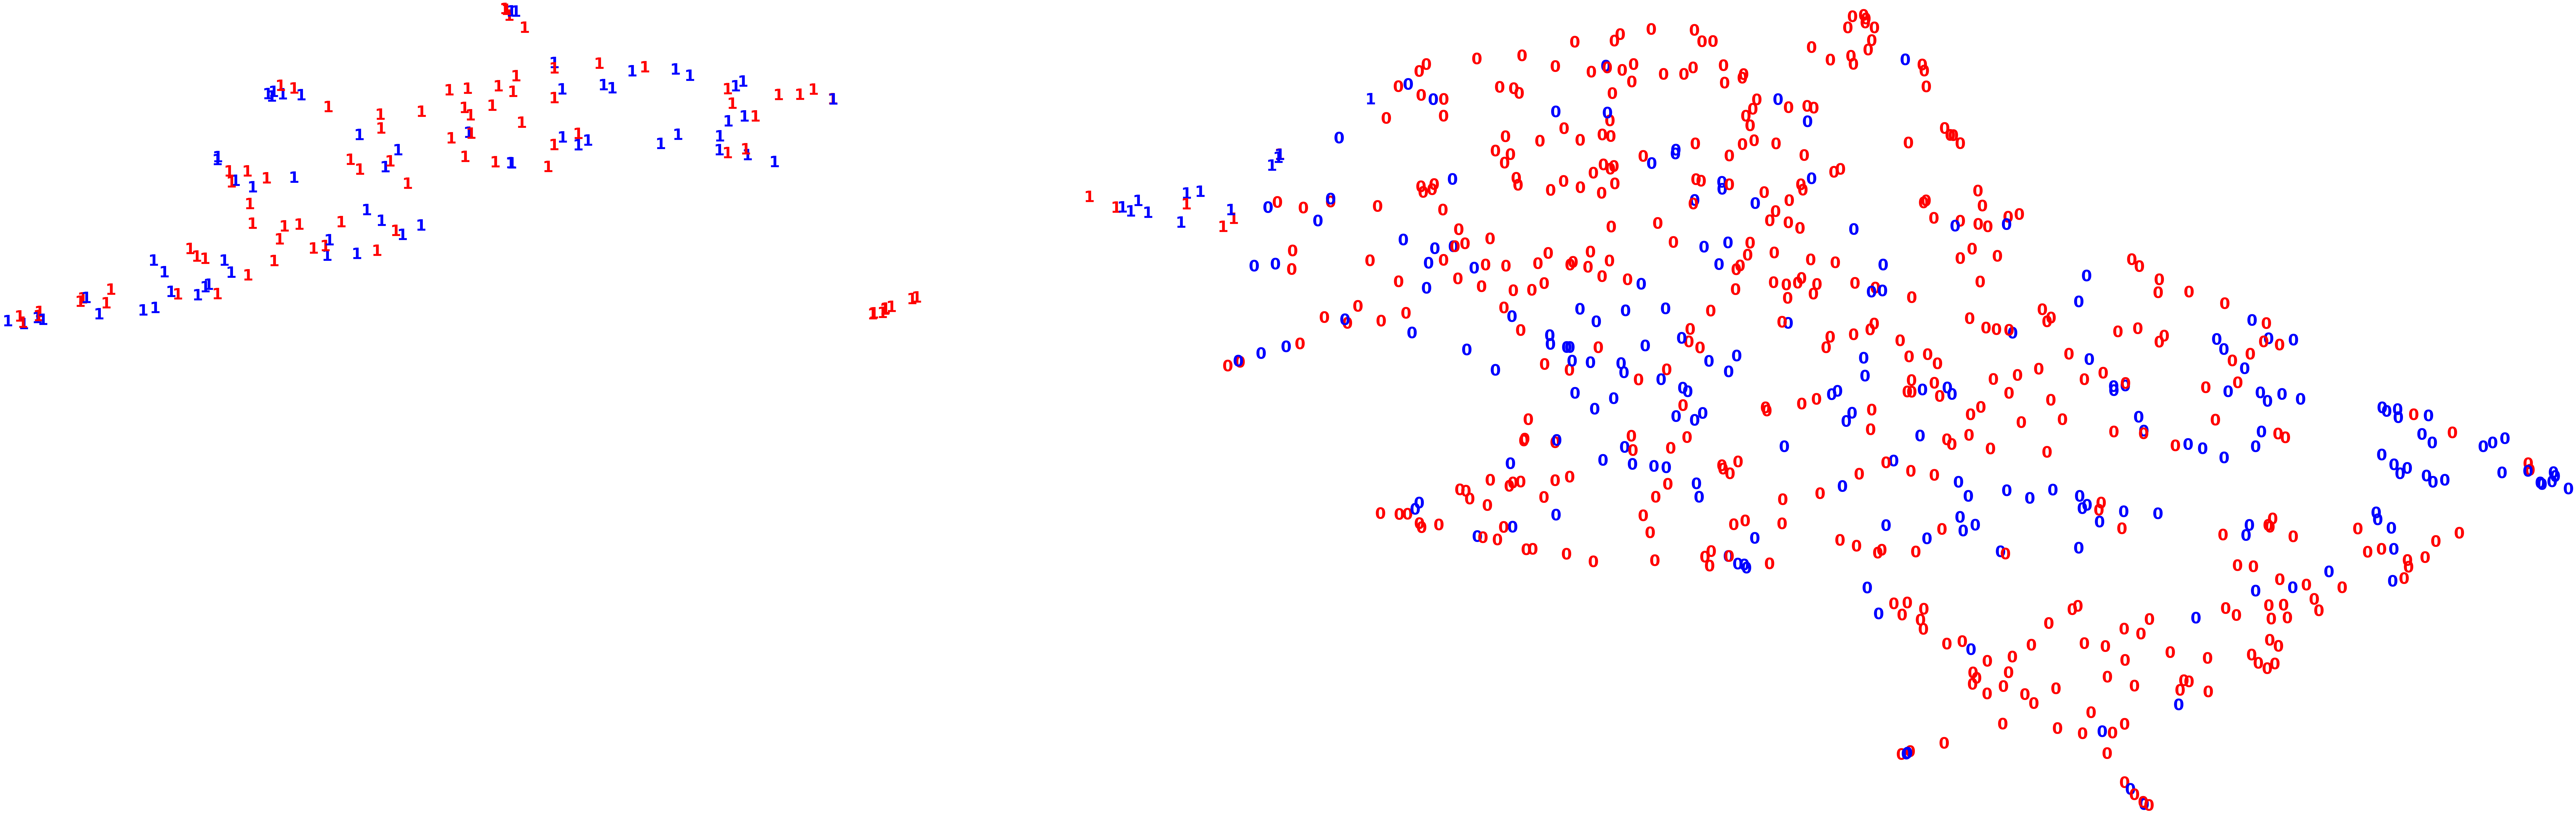

In [50]:
plot_pred(umap_results,y_pred)

In [57]:
pd.crosstab(y,y_pred)

col_0,0,1
Outcome,,
0,414,86
1,194,74


In [52]:
from sklearn import  metrics
print('silhouette_score:',metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
print('random index:' , metrics.rand_score(y,y_pred))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))

silhouette_score: 0.14648383491372055
random index: 0.536071273359409
adjusted random index: 0.04288232086622371


In [53]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

plot_pred(umap_results,clusters)

In [55]:
print('silhouette_score:',metrics.silhouette_score(X_std, clusters, metric='euclidean'))
print('random index:' , metrics.rand_score(y,clusters))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,clusters))

silhouette_score: 0.16744468209876806
random index: 0.5374972837896567
adjusted random index: 0.03834714250899498


In [56]:
pd.crosstab(y,clusters)

col_0,0,1
Outcome,,
0,428,72
1,206,62


### 5. Model performance
Both models performance is comparable and they are resonably on the positive side of the random index and silhouette score, based on the simplicity we can select the k means model for both of the models.

## 6. summary
The dimensionality regression plot provides an approximation of the clusters in the data, while unsupervised clustering techniques identify the optimal number of clusters for the dataset. 

I have selected a dataset with available labels, which makes it particularly interesting to evaluate the performance of supervised learning techniques. Given the results, further exploration using supervised learning approaches is recommended to fully assess the predictive capabilities of the model on this data.